In [1]:
#1.Imports
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [23]:
# 2. Chargement du dataset
df = pd.read_csv("movies.csv")
print(df.shape)
df.head()

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
# 3. Sélection des variables utiles (avant sortie du film)
cols = [
    "budget",
    "runtime",
    "genres",
    "popularity",
    "vote_average",
    "vote_count",
    "original_language",
    "revenue"
]
df = df[cols]
df.head()


,budget,runtime,genres,popularity,vote_average,vote_count,original_language,revenue
0,237000000,162.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,7.2,11800,en,2787965087
1,300000000,169.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,6.9,4500,en,961000000
2,245000000,148.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,6.3,4466,en,880674609
3,250000000,165.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,7.6,9106,en,1084939099
4,260000000,132.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,6.1,2124,en,284139100


In [4]:

# 4. Nettoyage des données
df.dropna(inplace=True)
df = df[df["budget"] > 0]
df = df[df["runtime"] > 0]
df.shape

(3762, 8)

In [5]:
# 4.5 Nettoyage sémantique de la variable "genres"
import ast

def extract_genre_names(genres_str):
    try:
        genres = ast.literal_eval(genres_str)
        return [g["name"] for g in genres]
    except:
        return []

df["genres"] = df["genres"].apply(extract_genre_names)

df.head()


,budget,runtime,genres,popularity,vote_average,vote_count,original_language,revenue
0,237000000,162.0,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,7.2,11800,en,2787965087
1,300000000,169.0,"[Adventure, Fantasy, Action]",139.082615,6.9,4500,en,961000000
2,245000000,148.0,"[Action, Adventure, Crime]",107.376788,6.3,4466,en,880674609
3,250000000,165.0,"[Action, Crime, Drama, Thriller]",112.312950,7.6,9106,en,1084939099
4,260000000,132.0,"[Action, Adventure, Science Fiction]",43.926995,6.1,2124,en,284139100


In [6]:
# 5. Création de la variable cible (Classe a prédire)
df["success"] = (df["revenue"] > df["budget"]).astype(int)
df["success"].value_counts()

success
1    2438
0    1324
Name: count, dtype: int64

In [7]:
#6.Suppression du data leakage (revenu)
df.drop(columns=["revenue"], inplace=True)
df.head()

# Export du dataset final lisible (avant encodage)
df.to_csv("dataset_final.csv", index=False)


In [8]:
#7.Séparation X / y
X = df.drop(columns=["success"])
y = df["success"]

print(X.shape)
print(y.shape)


(3762, 7)
(3762,)


In [9]:
# 8. Encodage des variables catégorielles

from sklearn.preprocessing import MultiLabelBinarizer

# --- Encodage des genres (multi-label) ---
mlb = MultiLabelBinarizer()

genres_encoded = mlb.fit_transform(X["genres"])
genres_df = pd.DataFrame(
    genres_encoded,
    columns=[f"genre_{g}" for g in mlb.classes_],
    index=X.index
)

# Supprimer l'ancienne colonne genres
X = X.drop(columns=["genres"])

# Ajouter les colonnes encodées
X = pd.concat([X, genres_df], axis=1)

# --- Encodage de la langue (catégorie simple) ---
X = pd.get_dummies(
    X,
    columns=["original_language"],
    drop_first=True
)

X.head()


,budget,runtime,popularity,vote_average,vote_count,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,...,original_language_pt,original_language_ro,original_language_ru,original_language_sv,original_language_te,original_language_th,original_language_tr,original_language_vi,original_language_xx,original_language_zh
0,237000000,162.0,150.437577,7.2,11800,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,300000000,169.0,139.082615,6.9,4500,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,245000000,148.0,107.376788,6.3,4466,1,1,0,0,1,...,False,False,False,False,False,False,False,False,False,False
3,250000000,165.0,112.312950,7.6,9106,1,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
4,260000000,132.0,43.926995,6.1,2124,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [10]:
#9.Normalisation
num_cols = ["budget", "runtime", "popularity", "vote_average", "vote_count"]

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

X[num_cols].describe()



,budget,runtime,popularity,vote_average,vote_count
count,3.762000e+03,3.762000e+03,3.762000e+03,3.762000e+03,3762.000000
mean,-6.043957e-17,1.662088e-16,6.043957e-17,-1.076580e-16,0.000000
std,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133
min,-8.693188e-01,-3.319144e+00,-7.551556e-01,-6.488843e+00,-0.637454
25%,-6.817472e-01,-6.980969e-01,-5.228409e-01,-5.509157e-01,-0.551954
50%,-3.300504e-01,-1.641799e-01,-2.438432e-01,7.412924e-02,-0.364970
75%,3.030038e-01,5.153508e-01,2.300928e-01,6.991742e-01,0.084831
max,8.040333e+00,1.109661e+01,2.466636e+01,3.928573e+00,9.586800


In [11]:
#10. Export & vérifications finales
print(X.shape)
print('X.columns',X.columns[:20])
print(y.shape)

X.columns.to_series().to_csv("features_after_encoding.csv", index=False)


(3762, 54)
X.columns Index(['budget', 'runtime', 'popularity', 'vote_average', 'vote_count',
       'genre_Action', 'genre_Adventure', 'genre_Animation', 'genre_Comedy',
       'genre_Crime', 'genre_Documentary', 'genre_Drama', 'genre_Family',
       'genre_Fantasy', 'genre_Foreign', 'genre_History', 'genre_Horror',
       'genre_Music', 'genre_Mystery', 'genre_Romance'],
      dtype='str')
(3762,)


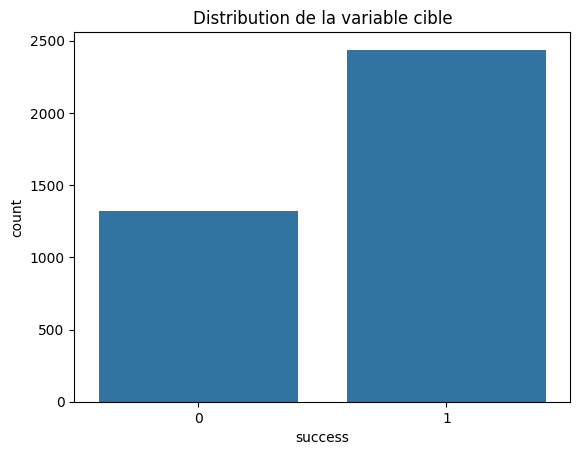

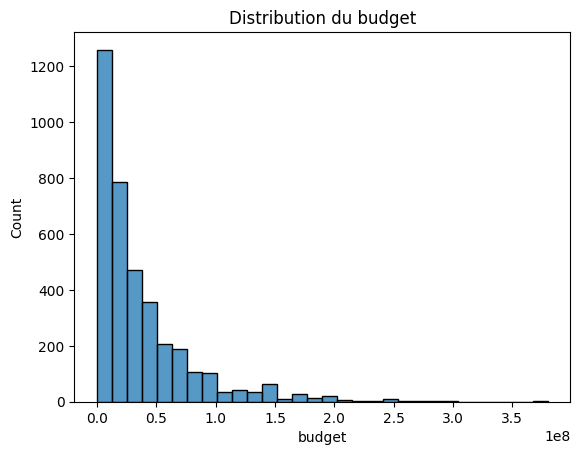

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="success", data=df)
plt.title("Distribution de la variable cible")
plt.show()

sns.histplot(df["budget"], bins=30)
plt.title("Distribution du budget")
plt.show()


In [13]:
#Seperation Train/Test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(X_train.shape, X_test.shape)


(3009, 54) (753, 54)


In [14]:
#Métriques d’évaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }


In [15]:
#Modèle 1 — Arbre de Décision

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

dt_results = evaluate_model(dt, X_test, y_test)
dt_results

{'Accuracy': 0.7264276228419655,
 'Precision': 0.7775590551181102,
 'Recall': 0.8094262295081968,
 'F1-score': 0.7931726907630522,
 'Confusion Matrix': array([[152, 113],
        [ 93, 395]])}

In [16]:
#Modèle 2 — K Plus Proches Voisins (KNN)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_results = evaluate_model(knn, X_test, y_test)
knn_results


{'Accuracy': 0.7423638778220452,
 'Precision': 0.7784090909090909,
 'Recall': 0.8422131147540983,
 'F1-score': 0.8090551181102362,
 'Confusion Matrix': array([[148, 117],
        [ 77, 411]])}

In [17]:
#Modèle 3 — Naïf Bayésien

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

nb_results = evaluate_model(nb, X_test, y_test)
nb_results

{'Accuracy': 0.4754316069057105,
 'Precision': 0.9696969696969697,
 'Recall': 0.19672131147540983,
 'F1-score': 0.3270868824531516,
 'Confusion Matrix': array([[262,   3],
        [392,  96]])}

In [18]:
#Modèle 4 — Bagging

from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bag.fit(X_train, y_train)

bag_results = evaluate_model(bag, X_test, y_test)
bag_results


{'Accuracy': 0.796812749003984,
 'Precision': 0.8178368121442126,
 'Recall': 0.8831967213114754,
 'F1-score': 0.8492610837438423,
 'Confusion Matrix': array([[169,  96],
        [ 57, 431]])}

In [19]:
#Modèle 5 — Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)

rf_results = evaluate_model(rf, X_test, y_test)
rf_results


{'Accuracy': 0.8140770252324038,
 'Precision': 0.8372093023255814,
 'Recall': 0.8852459016393442,
 'F1-score': 0.8605577689243028,
 'Confusion Matrix': array([[181,  84],
        [ 56, 432]])}

In [20]:
#Comparaison des modèles

import pandas as pd

results_df = pd.DataFrame([
    dt_results,
    knn_results,
    nb_results,
    bag_results,
    rf_results
], index=["Decision Tree", "KNN", "Naive Bayes", "Bagging", "Random Forest"])

results_df.drop(columns=["Confusion Matrix"])


,Accuracy,Precision,Recall,F1-score
Decision Tree,0.726428,0.777559,0.809426,0.793173
KNN,0.742364,0.778409,0.842213,0.809055
Naive Bayes,0.475432,0.969697,0.196721,0.327087
Bagging,0.796813,0.817837,0.883197,0.849261
Random Forest,0.814077,0.837209,0.885246,0.860558
